In [1]:
# 1. Import libraries and modules
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import cv2
from dataset import load_hoda

2024-05-29 18:29:12.086941: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-29 18:29:12.087193: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 18:29:12.089137: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-29 18:29:12.112433: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-29 18:29:12.499215: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# Load pre-shuffled HODA data into train and test sets
X_train, y_train, X_test, y_test = load_hoda(
                                            training_sample_size=3500,
                                            test_sample_size=400,size=32)

In [3]:
X_train.shape

(3500, 1024)

# reshape

In [4]:

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
X_train_32 = X_train.reshape(-1,32,32,1)
X_test_32 = X_test.reshape(-1,32,32,1)
X_train_32.shape

(3500, 32, 32, 1)

In [5]:
X_train_28 = np.zeros((X_train_32.shape[0], 28, 28, 1))
for i in range(X_train_32.shape[0]):
    # Resize the sample from shape (32, 32, 1) to shape (28, 28, 1) using OpenCV
    resized_sample = cv2.resize(X_train_32[i], (28, 28), interpolation=cv2.INTER_AREA)
    # Assign the resized sample to the corresponding index in the new numpy array
    X_train_28[i] = resized_sample.reshape((28, 28, 1))

X_test_28 = np.zeros((X_test_32.shape[0], 28, 28, 1))
for i in range(X_test_32.shape[0]):
    # Resize the sample from shape (32, 32, 1) to shape (28, 28, 1) using OpenCV
    resized_sample = cv2.resize(X_test_32[i], (28, 28), interpolation=cv2.INTER_AREA)
    # Assign the resized sample to the corresponding index in the new numpy array
    X_test_28[i] = resized_sample.reshape((28, 28, 1))

In [6]:
import matplotlib.pyplot as plt

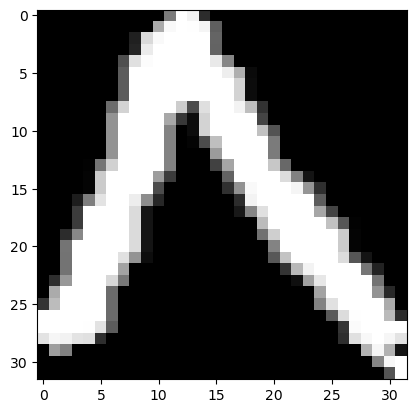

In [7]:
plt.imshow(X_test_32[0][:,:,0], cmap='gray')

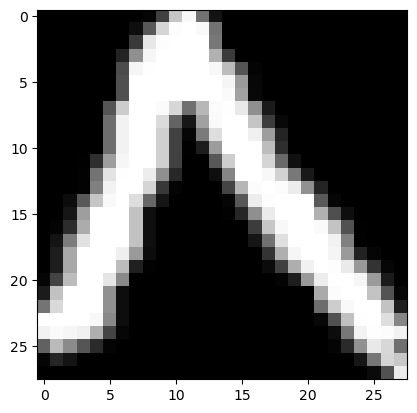

In [8]:
plt.imshow(X_test_28[0][:,:,0], cmap='gray')

In [9]:
# Preprocess input data
'''normalize our data values to the range [0, 1]'''
X_train_32 = X_train_32.astype('float32')
X_test_32 = X_test_32.astype('float32')
X_train_32 /= 255
X_test_32 /= 255

# Preprocess input data
'''normalize our data values to the range [0, 1]'''
X_train_28 = X_train_28.astype('float32')
X_test_28 = X_test_28.astype('float32')
X_train_28 /= 255
X_test_28 /= 255


In [10]:

# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


In [11]:
X_train_28.shape

(3500, 28, 28, 1)

# 1st senario

In [12]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
history = model.fit(X_train_28, y_train,
          epochs=200, batch_size=256, validation_split=0.2)


Epoch 1/200


/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.2125 - loss: 2.2165 - val_accuracy: 0.6271 - val_loss: 1.6326
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5103 - loss: 1.5349 - val_accuracy: 0.7486 - val_loss: 0.7923
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6648 - loss: 0.9820 - val_accuracy: 0.8171 - val_loss: 0.5716
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7243 - loss: 0.7676 - val_accuracy: 0.8614 - val_loss: 0.4188
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7792 - loss: 0.6085 - val_accuracy: 0.8886 - val_loss: 0.3502
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8184 - loss: 0.5143 - val_accuracy: 0.9043 - val_loss: 0.2991
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8509 - loss: 0.4393 - val_accuracy: 0.9186 - val_loss: 0.2370
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8663 - loss: 0.3984 - val_accuracy: 0.9257 - val_l

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9829 - loss: 0.0508 - val_accuracy: 0.9729 - val_loss: 0.0816
Epoch 52/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9809 - loss: 0.0575 - val_accuracy: 0.9686 - val_loss: 0.1039
Epoch 53/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9842 - loss: 0.0511 - val_accuracy: 0.9686 - val_loss: 0.1003
Epoch 54/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9810 - loss: 0.0490 - val_accuracy: 0.9686 - val_loss: 0.0976
Epoch 55/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9843 - loss: 0.0429 - val_accuracy: 0.9729 - val_loss: 0.0793
Epoch 56/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9791 - loss: 0.0554 - val_accuracy: 0.9729 - val_loss: 0.1036
Epoch 57/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9814 - loss: 0.0479 - val_accuracy: 0.9729 - val_loss: 0.1020
Epoch 58/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9824 - loss: 0.0511 - val_accuracy: 0.9729 

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9910 - loss: 0.0232 - val_accuracy: 0.9771 - val_loss: 0.1099
Epoch 102/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9874 - loss: 0.0285 - val_accuracy: 0.9786 - val_loss: 0.0896
Epoch 103/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9931 - loss: 0.0211 - val_accuracy: 0.9786 - val_loss: 0.0926
Epoch 104/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9814 - val_loss: 0.0826
Epoch 105/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9923 - loss: 0.0234 - val_accuracy: 0.9814 - val_loss: 0.0872
Epoch 106/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9860 - loss: 0.0356 - val_accuracy: 0.9800 - val_loss: 0.0895
Epoch 107/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9937 - loss: 0.0204 - val_accuracy: 0.9786 - val_loss: 0.0961
Epoch 108/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9938 - loss: 0.0156 - val_accuracy: 

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9956 - loss: 0.0148 - val_accuracy: 0.9800 - val_loss: 0.0973
Epoch 152/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9942 - loss: 0.0141 - val_accuracy: 0.9829 - val_loss: 0.0986
Epoch 153/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9933 - loss: 0.0192 - val_accuracy: 0.9800 - val_loss: 0.1161
Epoch 154/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9922 - loss: 0.0168 - val_accuracy: 0.9800 - val_loss: 0.1198
Epoch 155/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9930 - loss: 0.0166 - val_accuracy: 0.9757 - val_loss: 0.1023
Epoch 156/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9961 - loss: 0.0130 - val_accuracy: 0.9814 - val_loss: 0.1114
Epoch 157/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9954 - loss: 0.0121 - val_accuracy: 0.9800 - val_loss: 0.1069
Epoch 158/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9969 - loss: 0.0102 - val_accuracy: 

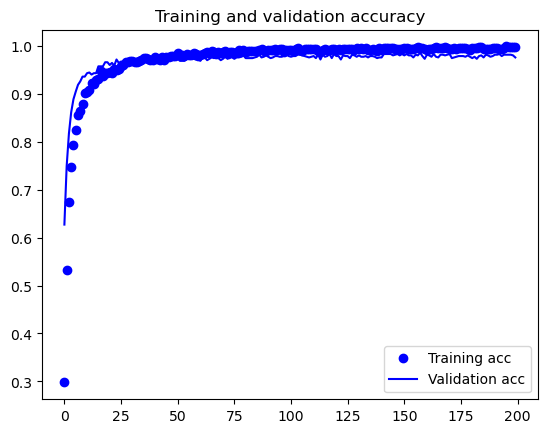

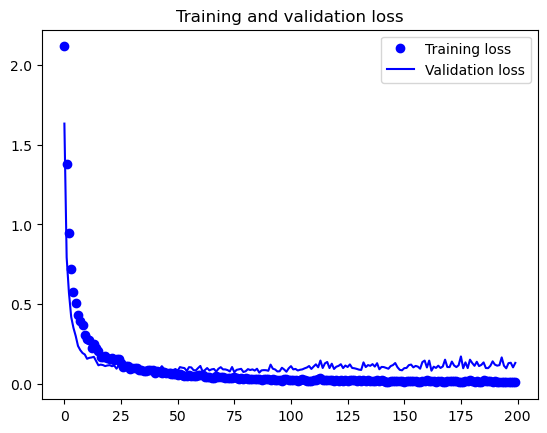

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
model.evaluate(X_test_28, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9864 - loss: 0.2352 


[0.1560041308403015, 0.987500011920929]

In [15]:
model.evaluate(X_test_32, y_test)

2024-05-29 18:31:25.766172: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at reshape_op.h:65 : INVALID_ARGUMENT: Only one input size may be -1, not both 0 and 1
2024-05-29 18:31:25.766195: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: Only one input size may be -1, not both 0 and 1
	 [[{{node sequential_1/flatten_1/Reshape}}]]


InvalidArgumentError: Graph execution error:

Detected at node sequential_1/flatten_1/Reshape defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/sahar/anaconda3/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/sahar/anaconda3/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/sahar/anaconda3/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_8435/3164611343.py", line 1, in <module>

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 425, in evaluate

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 161, in one_step_on_iterator

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 150, in one_step_on_data

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 78, in test_step

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/layers/layer.py", line 846, in __call__

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/ops/operation.py", line 48, in __call__

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/models/sequential.py", line 209, in call

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/models/functional.py", line 202, in call

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/ops/function.py", line 155, in _run_through_graph

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/models/functional.py", line 592, in call

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/layers/layer.py", line 846, in __call__

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/ops/operation.py", line 48, in __call__

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py", line 54, in call

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/ops/numpy.py", line 4415, in reshape

  File "/home/sahar/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/numpy.py", line 1778, in reshape

Only one input size may be -1, not both 0 and 1
	 [[{{node sequential_1/flatten_1/Reshape}}]] [Op:__inference_one_step_on_iterator_31823]

No! you cannot! It raises "Matrix size-incompatible" Error,
because we have used FC layers with **Flatten**

## solution?!

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [17]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.GlobalAveragePooling2D()) # the solution
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))



In [18]:
model.predict(X_train_32[:5])
model.summary()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (5, 30, 30, 32)        │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (5, 15, 15, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (5, 13, 13, 64)        │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (5, 6, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (5, 4, 4, 64)          │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (5, 64)                │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (5, 64)                │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (5, 64)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (5, 10)                │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,554 (236.54 KB)

 Trainable params: 60,554 (236.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
X_train_28.shape

(3500, 28, 28, 1)

In [19]:
# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# 7. Fit model on training data
history = model.fit(X_train_28, y_train,
          epochs=80, batch_size=256, validation_split=0.2)


Epoch 1/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.1447 - loss: 2.2791 - val_accuracy: 0.3986 - val_loss: 2.1560
Epoch 2/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2638 - loss: 2.1186 - val_accuracy: 0.5157 - val_loss: 1.7796
Epoch 3/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3924 - loss: 1.7975 - val_accuracy: 0.6171 - val_loss: 1.3446
Epoch 4/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4861 - loss: 1.4989 - val_accuracy: 0.7200 - val_loss: 1.0744
Epoch 5/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5606 - loss: 1.2471 - val_accuracy: 0.7757 - val_loss: 0.8155
Epoch 6/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.6258 - loss: 1.0611 - val_accuracy: 0.8086 - val_loss: 0.6574
Epoch 7/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6880 - loss: 0.9096 - val_accuracy: 0.8314 - val_loss: 0.5685
Epoch 8/80
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7301 - loss: 0.7747 - val_accuracy: 0.8571 - v

## lets evaluate it with 28x28

In [20]:
model.evaluate(X_test_28, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9899 - loss: 0.0383 


[0.04439634457230568, 0.987500011920929]

## Now try it with different size!!!!

In [21]:
model.evaluate(X_test_32, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9767 - loss: 0.0697 


[0.08004366606473923, 0.9775000214576721]